In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2
import seaborn as sns
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator,img_to_array

In [42]:
data = pd.read_excel('../input/covidct/COVID-CT-MetaInfo.xlsx')
data.head()

,2020.01.24.919183-p27-132.png,Patient 1,Unnamed: 2,"['Figure 1. Chest radiographs of patient 1. a. b. c. d. Chest computed tomographic scans of Patient 1 were obtained on the day of admission (day 6 after the onset of illness). Bilateral focal consolidation, lobar consolidation, and patchy consolidation were clearly observed, especially in the lower lung. ']"
0,2020.01.24.919183-p27-133.png,Patient 1,NaN,['Figure 1. Chest radiographs of patient 1. a....
1,2020.01.24.919183-p27-134.png,Patient 1,NaN,['Figure 1. Chest radiographs of patient 1. a....
2,2020.01.24.919183-p27-135.png,Patient 1,NaN,['Figure 1. Chest radiographs of patient 1. a....
3,2020.02.10.20021584-p6-52%0.png,Patient 2,NaN,['Figure 1. A 50-year-old man with 2019 novel ...
4,2020.02.10.20021584-p6-52%1.png,Patient 2,NaN,['Figure 1. A 50-year-old man with 2019 novel ...


In [43]:
covid_dir = os.listdir('/kaggle/input/covidct/CT_COVID/')
noncovid_dir = os.listdir('/kaggle/input/covidct/CT_NonCOVID/')

In [44]:
covid_dir[0]

'2020.03.20.20037325-p23-122.png'

In [45]:
print("Covid images: ",len(covid_dir))
print("Non-Covid images: ",len(noncovid_dir))

Covid images:  349
Non-Covid images:  397


Text(0.5, 1.0, 'non covid image')

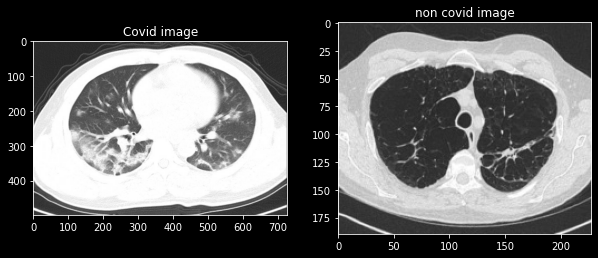

In [46]:
plt.style.use('dark_background')
covid_img = cv2.imread('../input/covidct/CT_COVID/2020.01.24.919183-p27-135.png')
non_covid_img = cv2.imread('../input/covidct/CT_NonCOVID/10%2.jpg')

fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,2,1)
plt.imshow(covid_img)
plt.title('Covid image')

fig.add_subplot(1,2,2)
plt.imshow(non_covid_img)
plt.title('non covid image')

In [47]:
print("Covid image shape: {}".format(covid_img.shape))
print("Non Covid image shape: {}".format(non_covid_img.shape))

Covid image shape: (500, 727, 3)
Non Covid image shape: (190, 228, 3)


In [48]:
img_height, img_width = 228, 228
batch_size = 128

In [49]:
DIR = '/kaggle/input/covidct/'

In [50]:
DIR

'/kaggle/input/covidct/'

In [51]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.05,
    validation_split=0.2) 

train_generator = train_datagen.flow_from_directory(
    DIR,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    color_mode="grayscale",
    subset='training') 

validation_generator = train_datagen.flow_from_directory(
    DIR, 
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    color_mode="grayscale",
    subset='validation') 

Found 598 images belonging to 2 classes.
Found 148 images belonging to 2 classes.


In [52]:
model = Sequential()

In [53]:
model.add(Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(img_height,img_height,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 228, 228, 64)      640       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 114, 114, 128)     73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 57, 57, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 57, 57, 256)       295168    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 28, 28, 256)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 200704)           

In [56]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [57]:
history = model.fit_generator(train_generator,
        steps_per_epoch = train_generator.samples // batch_size,
        validation_data = validation_generator, 
        validation_steps = validation_generator.samples // batch_size,
        epochs = 50)

Epoch 1/50
4/4 [==============================] - 7s 2s/step - loss: 1.9129 - accuracy: 0.4727 - val_loss: 0.7019 - val_accuracy: 0.5312
Epoch 2/50
4/4 [==============================] - 5s 1s/step - loss: 0.6930 - accuracy: 0.5280 - val_loss: 0.6883 - val_accuracy: 0.8000
Epoch 3/50
4/4 [==============================] - 6s 1s/step - loss: 0.6901 - accuracy: 0.5362 - val_loss: 0.6788 - val_accuracy: 0.5312
Epoch 4/50
4/4 [==============================] - 6s 1s/step - loss: 0.6936 - accuracy: 0.5293 - val_loss: 0.6672 - val_accuracy: 0.8000
Epoch 5/50
4/4 [==============================] - 6s 1s/step - loss: 0.6876 - accuracy: 0.5553 - val_loss: 0.6436 - val_accuracy: 0.6797
Epoch 6/50
4/4 [==============================] - 5s 1s/step - loss: 0.6687 - accuracy: 0.6319 - val_loss: 0.7372 - val_accuracy: 0.5000
Epoch 7/50
4/4 [==============================] - 6s 1s/step - loss: 0.6699 - accuracy: 0.5977 - val_loss: 0.5746 - val_accuracy: 0.7812
Epoch 8/50
4/4 [=========================

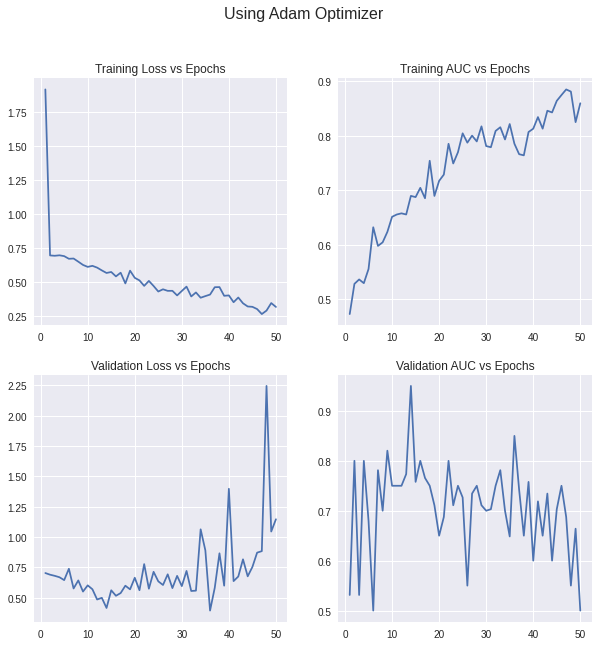

In [63]:
plt.style.use('seaborn')
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 51), y=history.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 51), y=history.history.get('accuracy'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 51), y=history.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 51), y=history.history.get('val_accuracy'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training AUC vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation AUC vs Epochs')
fig.suptitle('Using Adam Optimizer', size=16)
plt.show()

In [64]:
model1 = Sequential()

In [65]:
model1.add(Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(img_height,img_height,1)))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))


model1.add(Flatten())

model1.add(Dense(512,activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(256,activation='relu'))
model1.add(Dropout(0.3))

model1.add(Dense(1,activation='sigmoid'))

In [66]:
model1.compile(loss='binary_crossentropy',optimizer='RMSProp',metrics=['accuracy'])

In [67]:
history1 = model.fit_generator(train_generator,
        steps_per_epoch = train_generator.samples // batch_size,
        validation_data = validation_generator, 
        validation_steps = validation_generator.samples // batch_size,
        epochs = 50)

Epoch 1/50
4/4 [==============================] - 6s 2s/step - loss: 0.3345 - accuracy: 0.8489 - val_loss: 1.0512 - val_accuracy: 0.6719
Epoch 2/50
4/4 [==============================] - 5s 1s/step - loss: 0.2799 - accuracy: 0.8936 - val_loss: 1.2564 - val_accuracy: 0.4500
Epoch 3/50
4/4 [==============================] - 6s 1s/step - loss: 0.2853 - accuracy: 0.8617 - val_loss: 0.9263 - val_accuracy: 0.6484
Epoch 4/50
4/4 [==============================] - 5s 1s/step - loss: 0.2350 - accuracy: 0.8984 - val_loss: 1.4561 - val_accuracy: 0.6000
Epoch 5/50
4/4 [==============================] - 6s 1s/step - loss: 0.2879 - accuracy: 0.8894 - val_loss: 1.0832 - val_accuracy: 0.6562
Epoch 6/50
4/4 [==============================] - 5s 1s/step - loss: 0.2914 - accuracy: 0.8574 - val_loss: 0.2382 - val_accuracy: 0.9000
Epoch 7/50
4/4 [==============================] - 7s 2s/step - loss: 0.2770 - accuracy: 0.8750 - val_loss: 0.9389 - val_accuracy: 0.7188
Epoch 8/50
4/4 [=========================

In [ ]:
plt.style.use('dark_background')
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 51), y=history1.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 51), y=history1.history.get('accuracy'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 51), y=history1.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 51), y=history1.history.get('val_accuracy'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training AUC vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation AUC vs Epochs')
fig.suptitle('Using RMSProp Optimizer', size=16)
plt.show()